# Combinando dataframes

In [4]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

### Uniendo dataframes al estilo de SQL

In [5]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
display(df1)
display(df2)

key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6

key  data2
0   a      0
1   b      1
2   d      2

Indicator = Siempre ponerlo como parametro en el merge, permite tener info de donde viene
la data, del lado derecho o izquierdo. 

In [6]:
pd.merge(df1, df2)

key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0

In [7]:
pd.merge(df1, df2, on='key')

key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0

In [8]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

lkey  data1 rkey  data2
0    b      0    b      1
1    b      1    b      1
2    b      6    b      1
3    a      2    a      0
4    a      4    a      0
5    a      5    a      0

# Opciones para el how

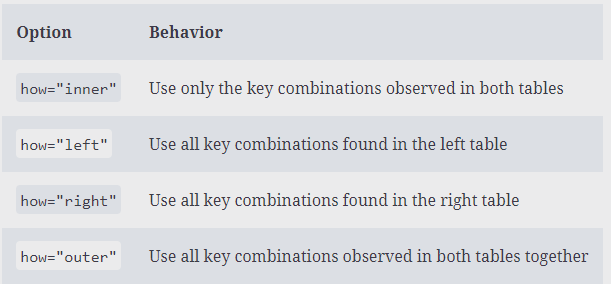

In [9]:
pd.merge(df1, df2, how='outer')

key  data1  data2
0   b    0.0    1.0
1   b    1.0    1.0
2   b    6.0    1.0
3   a    2.0    0.0
4   a    4.0    0.0
5   a    5.0    0.0
6   c    3.0    NaN
7   d    NaN    2.0

In [10]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
display(df1)
display(df2)


key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5

key  data2
0   a      0
1   b      1
2   a      2
3   b      3
4   d      4

In [11]:
pd.merge(df1, df2, on='key', how='right')

key  data1  data2
0    a    2.0      0
1    a    4.0      0
2    b    0.0      1
3    b    1.0      1
4    b    5.0      1
5    a    2.0      2
6    a    4.0      2
7    b    0.0      3
8    b    1.0      3
9    b    5.0      3
10   d    NaN      4

In [12]:
pd.merge(df1, df2, how='inner')

key  data1  data2
0   b      0      1
1   b      0      3
2   b      1      1
3   b      1      3
4   b      5      1
5   b      5      3
6   a      2      0
7   a      2      2
8   a      4      0
9   a      4      2

In [13]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

key1 key2  lval  rval
0  foo  one   1.0   4.0
1  foo  one   1.0   5.0
2  foo  two   2.0   NaN
3  bar  one   3.0   6.0
4  bar  two   NaN   7.0

In [14]:
pd.merge(left, right, on='key1')
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

key1 key2_left  lval key2_right  rval
0  foo       one     1        one     4
1  foo       one     1        one     5
2  foo       two     2        one     4
3  foo       two     2        one     5
4  bar       one     3        one     6
5  bar       one     3        two     7

### Merging on Index

In [15]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1
right1
pd.merge(left1, right1, left_on='key', right_index=True)

key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0

In [16]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
5   c      5        NaN

In [17]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
lefth
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [18]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

key1  key2  data  event1  event2
0    Ohio  2000   0.0     4.0     5.0
0    Ohio  2000   0.0     6.0     7.0
1    Ohio  2001   1.0     8.0     9.0
2    Ohio  2002   2.0    10.0    11.0
3  Nevada  2001   3.0     0.0     1.0
4  Nevada  2002   4.0     NaN     NaN
4  Nevada  2000   NaN     2.0     3.0

In [19]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
left2
right2
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

Ohio  Nevada  Missouri  Alabama
a   1.0     2.0       NaN      NaN
b   NaN     NaN       7.0      8.0
c   3.0     4.0       9.0     10.0
d   NaN     NaN      11.0     12.0
e   5.0     6.0      13.0     14.0

### Concatenating Along an Axis

In [23]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [24]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [25]:
pd.concat([s1, s2, s3], axis=1)

0    1    2
a  0.0  NaN  NaN
b  1.0  NaN  NaN
c  NaN  2.0  NaN
d  NaN  3.0  NaN
e  NaN  4.0  NaN
f  NaN  NaN  5.0
g  NaN  NaN  6.0

In [26]:
s4 = pd.concat([s1, s3])
s4
pd.concat([s1, s4], axis=1)
pd.concat([s1, s4], axis=1, join='inner')

0  1
a  0  0
b  1  1

#### Ejemplo con Merge

In [27]:
d1 = {'id': range(5), 
    'Name': ['Mary', 'Mark', 'John', 'Susy', 'Annie'],
    'Expense': [2300, 2100, 310, 890, 450]}
d2 = {'id_Name': range(5),
    'Income': [780, 6520, 470, 575, 6540]}
dataframe_1 = pd.DataFrame(d1)
dataframe_2 = pd.DataFrame(d2)
display(dataframe_1)
display(dataframe_2)

id   Name  Expense
0   0   Mary     2300
1   1   Mark     2100
2   2   John      310
3   3   Susy      890
4   4  Annie      450

id_Name  Income
0        0     780
1        1    6520
2        2     470
3        3     575
4        4    6540

In [28]:
df_merged = pd.merge(dataframe_1, dataframe_2, left_on='id', right_on='id_Name', indicator=True)
df_merged

id   Name  Expense  id_Name  Income _merge
0   0   Mary     2300        0     780   both
1   1   Mark     2100        1    6520   both
2   2   John      310        2     470   both
3   3   Susy      890        3     575   both
4   4  Annie      450        4    6540   both

Ejemplo 2

In [29]:
d3 = {'A': range(5), 
    'B': ['a', 'b', 'c', 'd', 'e'],
    'C': [100, 200, 300, 400, 500]} 
d4 = {'A': range(7),
    'E': ['x', 'y', 'z', 's', 'p', 'r', 'm']}
dataframe_3 = pd.DataFrame(d3)
dataframe_4 = pd.DataFrame(d4)
display(dataframe_3)
display(dataframe_4)

A  B    C
0  0  a  100
1  1  b  200
2  2  c  300
3  3  d  400
4  4  e  500

A  E
0  0  x
1  1  y
2  2  z
3  3  s
4  4  p
5  5  r
6  6  m

In [30]:
pd.merge(dataframe_3, dataframe_4, how='outer', indicator=True)
# Utilizando how (tipo de union)
# Outer es para obtener todos los registros. 

A    B      C  E      _merge
0  0    a  100.0  x        both
1  1    b  200.0  y        both
2  2    c  300.0  z        both
3  3    d  400.0  s        both
4  4    e  500.0  p        both
5  5  NaN    NaN  r  right_only
6  6  NaN    NaN  m  right_only

In [31]:
pd.merge(dataframe_3, dataframe_4, how='inner', indicator=True)

A  B    C  E _merge
0  0  a  100  x   both
1  1  b  200  y   both
2  2  c  300  z   both
3  3  d  400  s   both
4  4  e  500  p   both